# <u>Avocado Dataset Analysis and ML Prediction</u>

### * Problem Statement

- The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __(EDA)__ for analysis purpose.

- In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

<ul>The variables of the dataset are the following:</ul>

* Categorical: ‘region’,’type’
* Date: ‘Date’
* Numerical:’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
* Target:‘AveragePrice’

<a id=section2></a>

### * Importing packages

In [1]:
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

- Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("avocado.csv")

<a id=section3></a>

### * Data Profiling

<a id=section4></a>

### * Understanding the Avocado Dataset

- Lets check our data shape:
- __Dataset__  has __18249 rows__ and __14 columns.__

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [6]:
df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Well as a first observation we can see that we are lucky, we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [8]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


- We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [9]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- We can see that __no missing values__ exist in dataset, that's great!

<a id=section5></a>

### * Preprocessing

- The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

- Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

- Lets check the head to see what we have done:

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<a id=section7></a>


### * Data Visualisation 

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

<a id=section8></a>

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

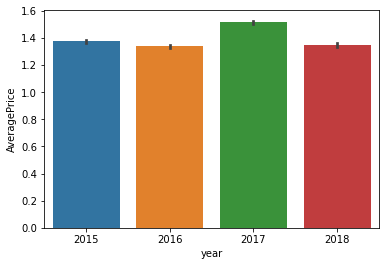

In [14]:
sns.barplot(x="year",y="AveragePrice",data=df)

In each year the avarage price falls between the range of 1.4 - 1.6.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

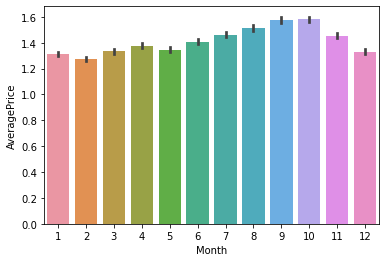

In [15]:
sns.barplot(x="Month",y="AveragePrice",data=df)

September and October are the month where max no of average price is there, but the thing is almost for whole year the price is almost same for the avocado this prove that there is so much craze of avocado rather than India.


<a id=section9></a>

<AxesSubplot:xlabel='AveragePrice'>

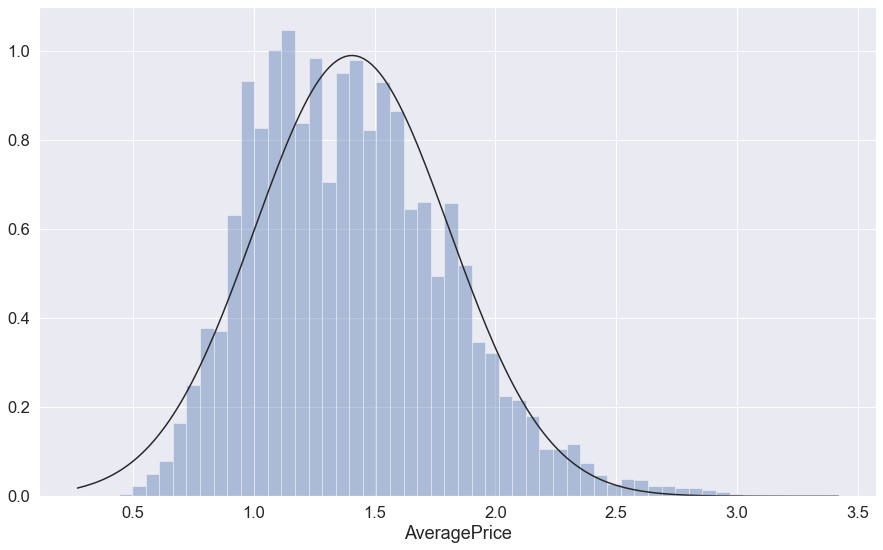

In [16]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

- Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

- Let's look at average price of conventional vs. organic. 

<a id=section10></a>

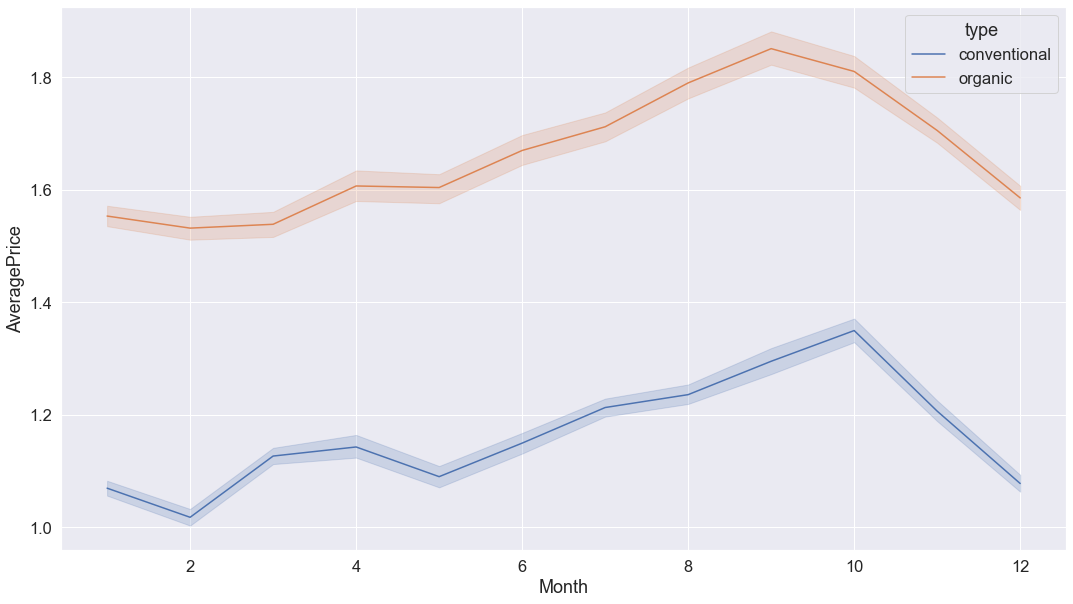

In [22]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

- Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

###  * Now lets plot Average price distribution based on region 

<a id=section11></a>

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

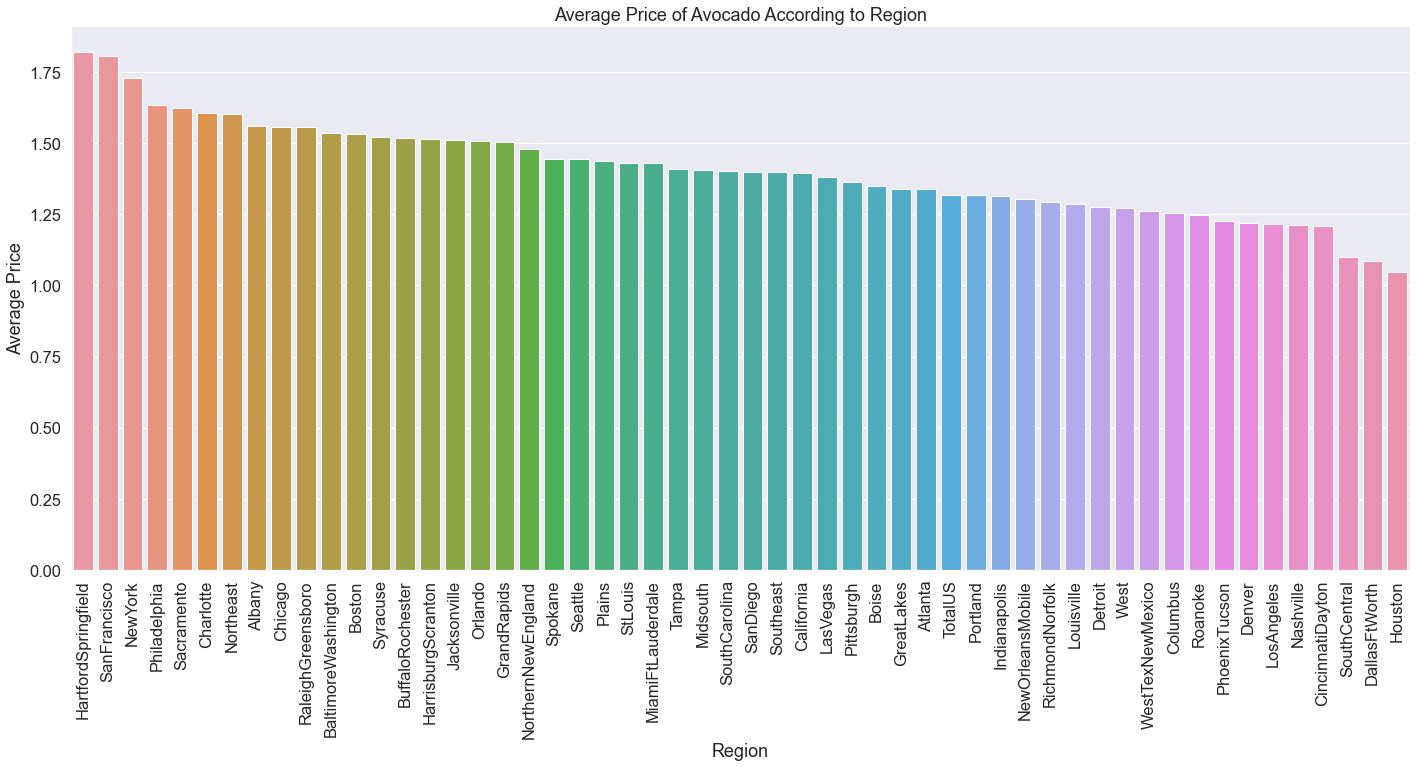

In [23]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

- <ul>Looks like these region are where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

<a id=section12></a>

Text(0.5, 1.0, 'Average of Total Volume According to Region')

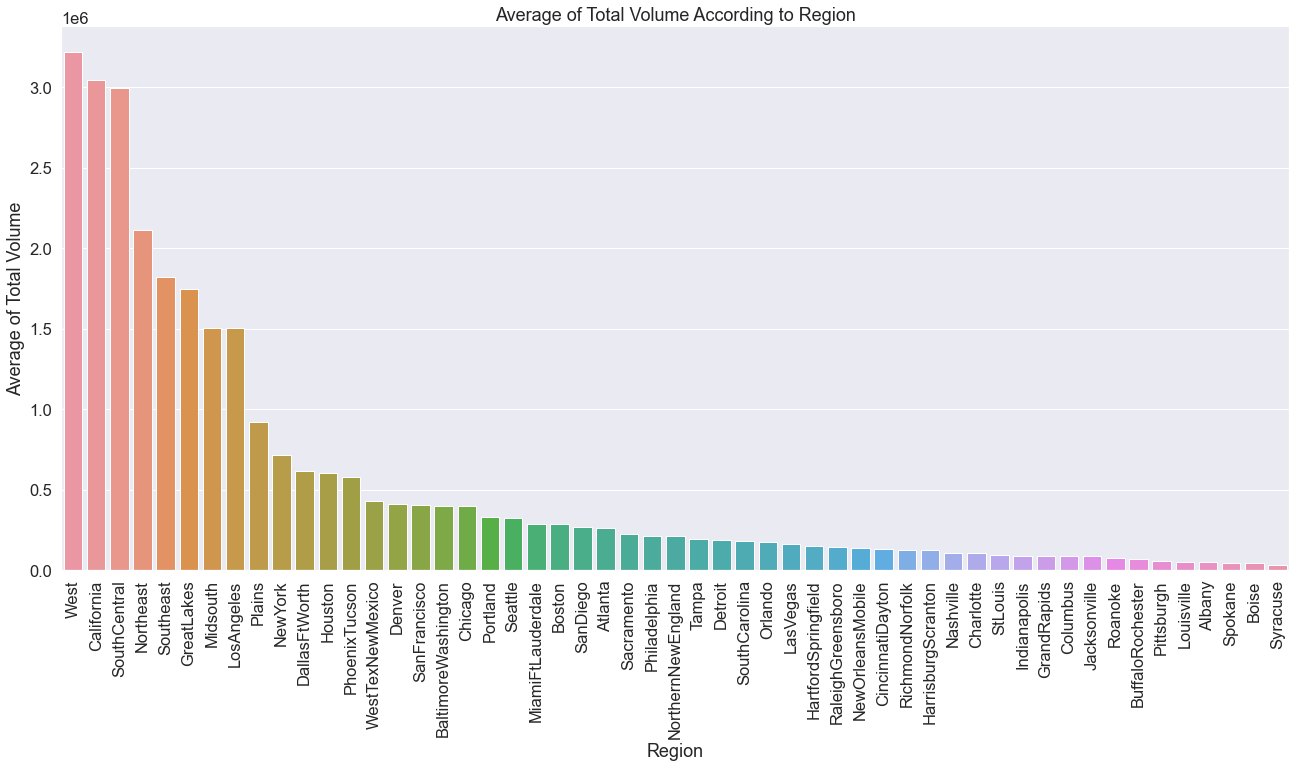

In [24]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

- <ul>Looks like these region are where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section13></a>

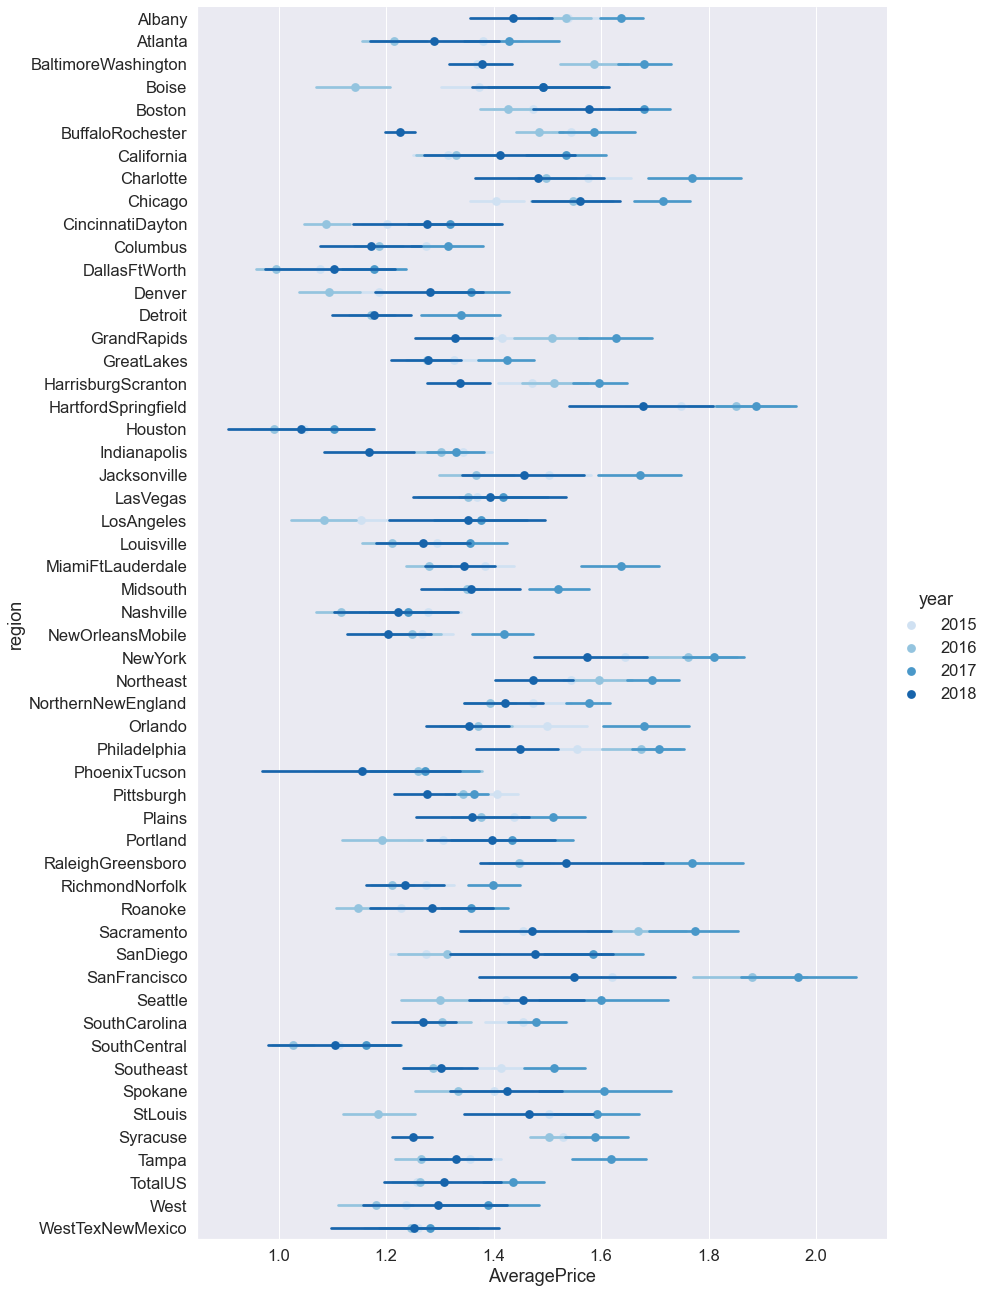

In [25]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

- Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region.

<a id=section14></a>

- Now lets do some plots!! I'll start by plotting the Avocado's Average Price  through the Date column

Text(0.5, 1.0, 'Average Price')

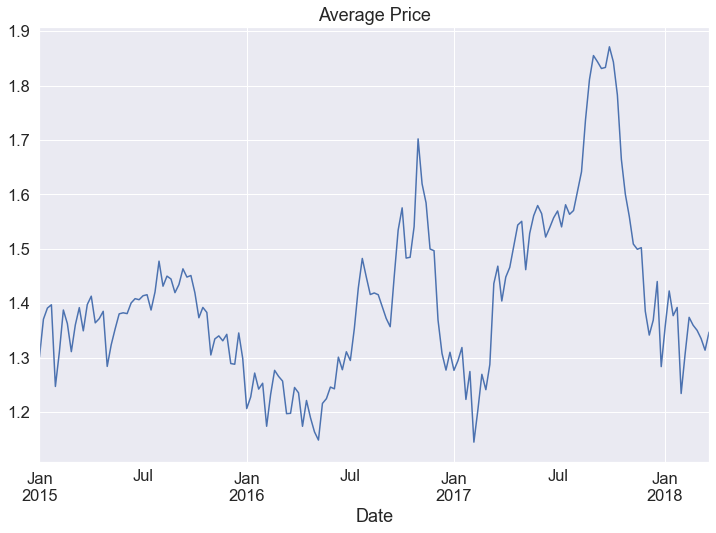

In [26]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

- This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.

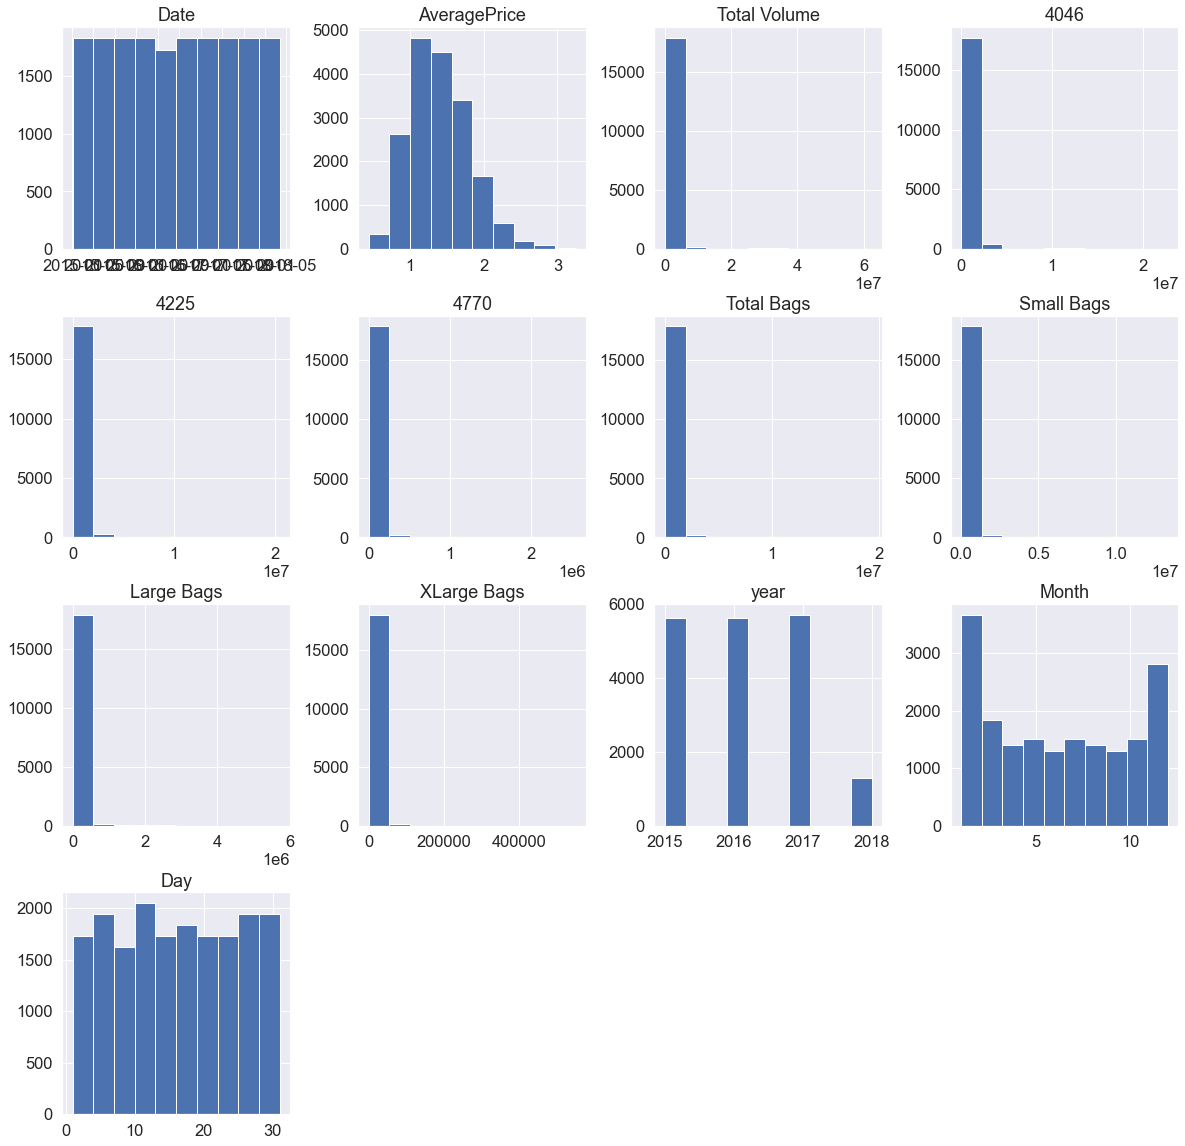

In [30]:
# to check all variables at once

df.hist( bins = 10, figsize = (20,20))
plt.show()

<a id=section15></a>

-Average price column is normally distributing over the histogram.
-Rest of the data are not much varying in term of numbers, so they are almost left skewed data
-To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.


# Skewness

In [17]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

-we are first calculating the skew value and some of the column skew value are far from zero.
-The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [18]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [19]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

Now I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.

In [20]:
df.drop(['Date'],axis=1,inplace=True)

# Lebal Encoder

-Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. Label Encoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier
-Convert Region and Type into numeric value by using encoder.

In [21]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df['region']=le.fit_transform (df['region'])
df['type']=le.fit_transform(df['type'])

In [22]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11,29


In [23]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2,4
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1,28
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1,21
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1,14
18248,1.62,9.769418,7.971006,7.765200,5.418453,9.393924,9.391757,3.296207,0.0,1,2018,53,1,7


# OUTLIEARS

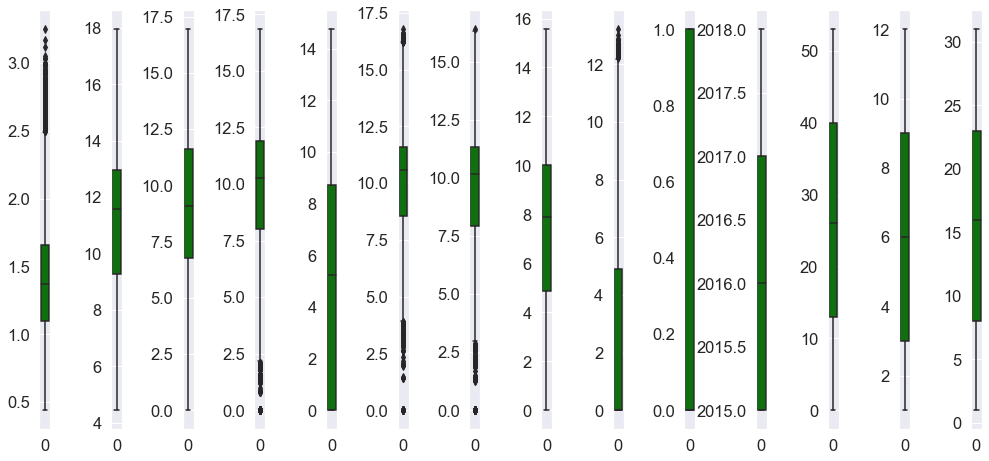

In [24]:
import seaborn as sns
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df[collist[i]],color='green',orient='v')
    plt.tight_layout()

we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values.

In [25]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(18249, 14)

In [26]:
threshold=3
print(np.where(z>3))

(array([ 5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
       11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
       11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
       11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
       11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
       11336, 11337

In [27]:
len(np.where(z>3)[0])

453

In [28]:
df_new=df.drop([5482,  5483,  5484,  5485,  8344,  8345,  9189,  9190,  9191,
        9192,  9192,  9203,  9204,  9205,  9206,  9211,  9212,  9212,
        9213,  9218,  9219,  9220,  9221,  9293,  9294,  9298,  9668,
        9894,  9894, 10154, 10232, 10234, 10324, 10325, 10326, 10327,
       10331, 10332, 10333, 10334, 10334, 10375, 10377, 10380, 10382,
       10388, 10392, 10397, 10398, 10417, 10419, 10420, 10531, 10532,
       10533, 10534, 10535, 10536, 10562, 10563, 10566, 11011, 11012,
       11014, 11015, 11016, 11017, 11018, 11019, 11020, 11021, 11022,
       11023, 11024, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
       11031, 11032, 11033, 11034, 11035, 11036, 11037, 11039, 11040,
       11041, 11042, 11314, 11316, 11318, 11319, 11320, 11320, 11320,
       11321, 11321, 11321, 11322, 11323, 11324, 11324, 11325, 11325,
       11325, 11326, 11326, 11327, 11327, 11328, 11329, 11329, 11330,
       11330, 11331, 11331, 11332, 11332, 11333, 11333, 11334, 11335,
       11336, 11337, 11338, 11338, 11339, 11340, 11341, 11342, 11347,
       11347, 11348, 11348, 11349, 11349, 11350, 11350, 11351, 11352,
       11353, 11354, 11354, 11373, 11374, 11375, 11376, 11378, 11379,
       11380, 11381, 11382, 11383, 11384, 11385, 11386, 11387, 11387,
       11388, 11388, 11389, 11390, 11391, 11392, 11393, 11394, 11395,
       11397, 11398, 11399, 11400, 11401, 11402, 11403, 11404, 11405,
       11406, 11571, 11572, 11573, 11574, 11578, 11579, 11583, 11584,
       11585, 11586, 11587, 11588, 11589, 11590, 11591, 11592, 11593,
       11594, 11594, 11595, 11595, 11596, 11596, 11597, 11597, 11598,
       11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606,
       11609, 11610, 11611, 11611, 11612, 11613, 11614, 11614, 11662,
       11662, 11663, 11734, 11735, 11736, 11737, 11738, 11739, 11740,
       11742, 11743, 11744, 11746, 11747, 11748, 11749, 11751, 11771,
       11985, 11986, 11993, 12097, 12131, 12132, 12132, 12564, 12565,
       12566, 12821, 12823, 12982, 13033, 13035, 13037, 13038, 13178,
       13179, 13225, 13228, 13338, 13341, 13342, 13343, 13345, 13346,
       13349, 13350, 13351, 13354, 13356, 13357, 13359, 13360, 13361,
       13363, 13365, 13366, 13367, 13369, 13381, 13382, 13383, 13385,
       13395, 13657, 13661, 13847, 13853, 14019, 14020, 14073, 14074,
       14119, 14120, 14121, 14122, 14123, 14124, 14125, 14126, 14128,
       14129, 14177, 14385, 14385, 14385, 14386, 14387, 14401, 14404,
       14405, 14406, 14407, 14408, 14409, 14410, 14411, 14412, 14413,
       14414, 14416, 14419, 14420, 14421, 14424, 14425, 14426, 14427,
       14428, 14463, 14465, 14699, 14701, 14702, 14807, 14842, 14843,
       14844, 14845, 14846, 14911, 14912, 14913, 14914, 14915, 14916,
       14917, 14918, 14919, 15124, 15125, 15127, 15128, 15129, 15130,
       15510, 15511, 15667, 15668, 15671, 15673, 15674, 15814, 15871,
       16024, 16050, 16055, 16202, 16203, 16205, 16206, 16209, 16210,
       16211, 16212, 16213, 16214, 16215, 16217, 16218, 16220, 16223,
       16395, 16399, 16421, 16570, 16572, 16589, 16660, 16661, 16662,
       16663, 16664, 16665, 16666, 16667, 16714, 16715, 16717, 16718,
       16719, 16720, 16721, 16734, 16737, 16738, 16985, 16986, 16994,
       16995, 16996, 16997, 16998, 16999, 17000, 17007, 17008, 17009,
       17010, 17015, 17017, 17031, 17032, 17033, 17034, 17035, 17036,
       17037, 17038, 17039, 17040, 17047, 17244, 17245, 17246, 17247,
       17248, 17249, 17250, 17251, 17255, 17300, 17301, 17302, 17303,
       17304, 17402, 17428],axis=0)

In [29]:
df_new.shape

(17834, 14)

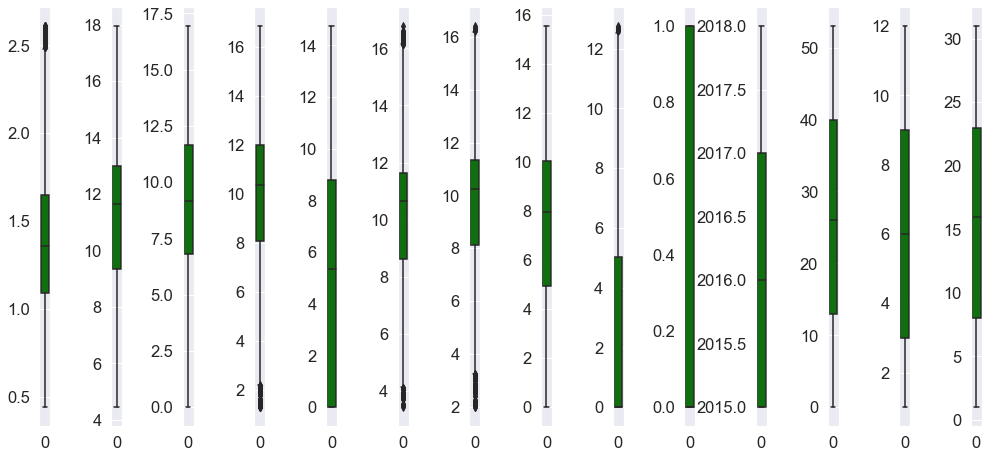

In [30]:
import seaborn as sns
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [31]:
df=df_new

I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
After, removing the outlier’s final there are 17834 and 14 column presents in the data set.

# CORRELATION

<AxesSubplot:>

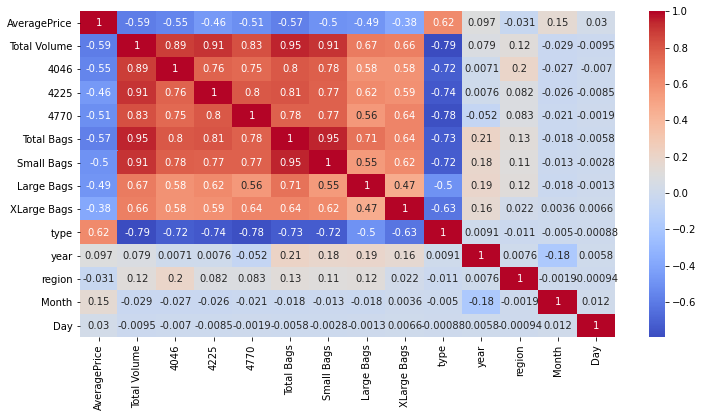

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

- As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model.


## * Model selection/predictions

- Now our data are ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
- Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

<a id=section18></a>

# Linear Regression

In [40]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA



In [117]:
X=df.iloc[:,1:14]
y=df['AveragePrice']

In [118]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state = i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5782658873618187
At random state 0,the testing accuracy is:- 0.5623035880359133


At random state 1,the training accuracy is:- 0.5732621018161798
At random state 1,the testing accuracy is:- 0.5729945426156359


At random state 2,the training accuracy is:- 0.577615344828333
At random state 2,the testing accuracy is:- 0.5640560926984322


At random state 3,the training accuracy is:- 0.5699567479114289
At random state 3,the testing accuracy is:- 0.5795478696101646


At random state 4,the training accuracy is:- 0.5746793516307275
At random state 4,the testing accuracy is:- 0.5698493145449526


At random state 5,the training accuracy is:- 0.5702383184712108
At random state 5,the testing accuracy is:- 0.5791087967948991


At random state 6,the training accuracy is:- 0.5697298448590755
At random state 6,the testing accuracy is:- 0.5798706224906776


At random state 7,the training accuracy is:- 0.5669918484558192
At random state 7,the testing accu

#  Creating and Training the Model

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=81)
lr=LinearRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)
acc=r2_score(y_test,pred1)
print(acc)

0.5806603405940223


In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 0.19768640576614674
MSE: 0.06256816087519541
RMSE: 0.2501362846034046


- The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
- Lets plot the __y_test vs the predictions__

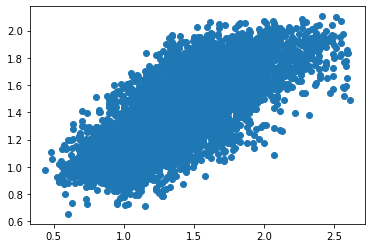

In [121]:
plt.scatter(x=y_test,y=pred1)

- As we can see that __we don't have a straight line so we are not sure that this is the best model we can apply on our data__

# AdaBoostRegressor

In [122]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred2=ada.predict(X_test)
acc=r2_score(y_test,pred2)
print(acc)

0.5687644273357222


In [123]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

MAE: 0.20499554439374124
MSE: 0.06434310726485253
RMSE: 0.2536594316497073


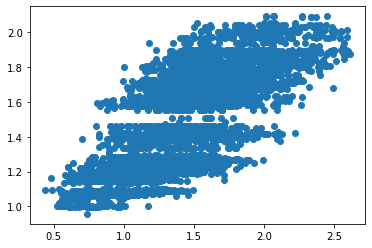

In [124]:
plt.scatter(x=y_test,y=pred2)

Here also we see that __we don't have a straight line so we are not sure that this is the best model we can apply on our data__

# KNeighborsRegressor

In [125]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
pred3=knn.predict(X_test)
acc=r2_score(y_test,pred3)
print(acc)

0.6404096801440509


In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

MAE: 0.17613251783893985
MSE: 0.05365317703024125
RMSE: 0.23163155447874811


Text(0, 0.5, 'Predicted Y')

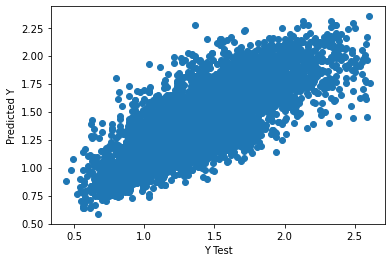

In [127]:
plt.scatter(x=y_test,y=pred3)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

This is better than previous one. but we try some another Regressor also.

# Decision Tree Regression

In [128]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred4=dtr.predict(X_test)
acc=r2_score(y_test,pred4)
print(acc)

0.7401722853917185


Text(0, 0.5, 'Predicted Y')

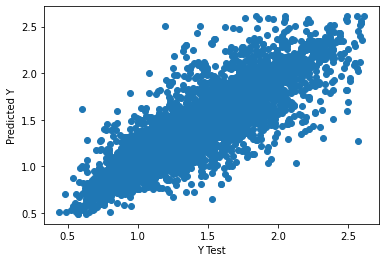

In [129]:
plt.scatter(x=y_test,y=pred4)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Nice, here we can see that __we nearly have a straight line__, in other words __its better than the Previous regression model, and to be more sure lets check the RMSE__

In [130]:
print('MAE:', metrics.mean_absolute_error(y_test, pred4))
print('MSE:', metrics.mean_squared_error(y_test, pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred4)))

MAE: 0.13076792388718994
MSE: 0.038767957866123005
RMSE: 0.19689580459248746


- Very Nice, our __RMSE is lower than the previous one we got. Now we are going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

<a id=section20></a>

# Random Forest Regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred_t=rdr.predict(X_train)
pred5=rdr.predict(X_test)
acc=r2_score(y_test,pred5)
print(acc)

0.885018564584032


In [132]:
print('MAE:', metrics.mean_absolute_error(y_test, pred5))
print('MSE:', metrics.mean_squared_error(y_test, pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred5)))

MAE: 0.09237052327556915
MSE: 0.01715596602276588
RMSE: 0.13098078493720322


- Well as we can see the __RMSE is lower than the previous models__, so the __RandomForest Regressor is the best model in this case.__

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

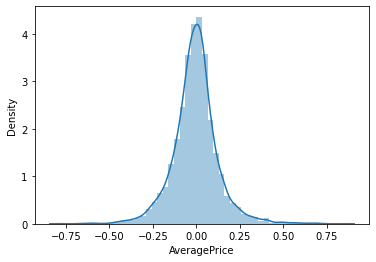

In [133]:
sns.distplot((y_test-pred5),bins=50)

- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

# Cross Validation

In [137]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rdr,X,y,cv=6)
print("cross validation score of LR is:",scr.mean())

cross validation score of LR is: 0.1440095849575289


In [135]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rdr,X,y,cv=5)
print("cross validation score of Random Forest is:",scr.mean())

cross validation score of Random Forest is: 0.22566107804714974


<a id=section21></a>

# Regularization

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [139]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [140]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(X_train,y_train)
ls_score_training=ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)
ls_score_training*100

56.94813571476514

In [141]:
lss=r2_score(y_test,pred_ls)
lss*100

58.062728607564566

In [142]:
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

24.92850045274091

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [151]:
rf= RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(X_train, y_train)
rf.score(X_train, y_train)
pred_decision = rf.predict(X_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,X,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 88.49046066130471
Cross Val Score: 22.779695912734752


- __Lets see final Actual Vs Predicted sample.__

In [155]:
import pickle
filename='Avocado_Avarage.pkl'
pickle.dump(rf,open(filename,'wb'))

In [157]:
import pickle
loaded_model=pickle.load(open('Avocado_Avarage.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

88.49046066130471


In [160]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["Predicted","original"])

In [161]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5876,5877,5878,5879,5880,5881,5882,5883,5884,5885
Predicted,1.8258,1.1942,1.0565,2.0178,1.1207,1.0413,1.048,1.3103,1.888,1.6206,...,1.9435,1.1558,1.3354,2.2449,1.8092,1.3143,2.438,1.4421,0.7571,1.6827
original,1.8258,1.1942,1.0565,2.0178,1.1207,1.0413,1.048,1.3103,1.888,1.6206,...,1.9435,1.1558,1.3354,2.2449,1.8092,1.3143,2.438,1.4421,0.7571,1.6827


<a id=section22></a>

## * Conclusions

The best Regressor for My model is Random Forest. so I choose that. I hope It give correct prediction.

# prediction for Region

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11,29


In [35]:
x=df.drop(columns=['region'])
y=df['region']

In [36]:
x_c=df.drop(columns=['region'])
y_c=df[['region']]

In [37]:
sc=StandardScaler()
sc.fit_transform(x)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [38]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),LogisticRegression()]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pred_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pred_c)
        print("accuracy score correspond to random state",r_state,"is",ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c

print(final_state,max_accuracy_score,final_model)

accuracy score correspond to random state 40 is 0.7883112470268434
accuracy score correspond to random state 40 is 0.36850152905198774
accuracy score correspond to random state 40 is 0.9019707781175671
accuracy score correspond to random state 40 is 0.17057424396873938
accuracy score correspond to random state 41 is 0.7774379884471627
accuracy score correspond to random state 41 is 0.3681617397213727
accuracy score correspond to random state 41 is 0.9011213047910296
accuracy score correspond to random state 41 is 0.1877336051647978
accuracy score correspond to random state 42 is 0.7935779816513762
accuracy score correspond to random state 42 is 0.37172952769283046
accuracy score correspond to random state 42 is 0.9087665647298675
accuracy score correspond to random state 42 is 0.17006455997281686
accuracy score correspond to random state 43 is 0.790859667006456
accuracy score correspond to random state 43 is 0.36680258239891267
accuracy score correspond to random state 43 is 0.90791709

In [39]:
train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=46,test_size=0.33)
KNC=KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 10}

In [40]:
KNC = KNeighborsClassifier(n_neighbors=10)
KNC.fit(train_xc,train_yc)
predc=KNC.predict(test_xc)
acu_score=accuracy_score(test_yc,predc)
print("Accuracy score",acu_score*100)

Accuracy score 40.40095141012572


In [41]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [42]:
train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=87,test_size=0.33)
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(train_xc,train_yc)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [43]:
GCV_pred=GCV.best_estimator_.predict(test_xc)
accuracy_score(test_yc,GCV_pred)

0.7981651376146789

In [44]:
score=cross_val_score(KNC,x_c,y_c,cv=100,scoring='accuracy')
print('Cross_val_score',score*100)
print('Mean score',score.mean()*100)
print('STD score',acu_score*100)

Cross_val_score [50.27932961 61.45251397 50.83798883 62.01117318 58.65921788 61.45251397
 55.30726257 60.33519553 53.0726257  59.77653631 56.42458101 44.69273743
 46.36871508 48.04469274 55.86592179 50.83798883 51.39664804 46.36871508
 52.51396648 49.16201117 38.54748603 45.25139665 49.16201117 47.48603352
 40.78212291 48.60335196 46.36871508 44.69273743 51.39664804 51.95530726
 45.81005587 44.69273743 41.34078212 47.48603352 40.4494382  50.56179775
 43.25842697 47.19101124 43.25842697 43.82022472 41.57303371 46.06741573
 44.38202247 44.94382022 46.06741573 48.31460674 51.68539326 42.13483146
 37.07865169 40.4494382  39.3258427  38.76404494 40.4494382  41.57303371
 45.50561798 44.38202247 41.01123596 41.01123596 41.57303371 42.13483146
 44.94382022 47.19101124 42.13483146 38.76404494 44.94382022 35.39325843
 41.57303371 32.02247191 35.95505618 39.3258427  43.25842697 43.82022472
 51.12359551 46.06741573 41.57303371 43.25842697 44.38202247 39.88764045
 43.82022472 40.4494382  39.8876404

In [45]:
score=cross_val_score(GCV,x_c,y_c,cv=5,scoring='accuracy')
print('Cross_val_score',score*100)
print('Mean score',score.mean()*100)
print('STD score',acu_score*100)

Cross_val_score [60.58312307 78.07681525 67.78805719 58.08802916 46.41054403]
Mean score 62.189313739502495
STD score 40.40095141012572


# Conclusion

In [49]:
import pickle
filename='Avocado1.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [52]:
import pickle
loaded_model=pickle.load(open('Avocado1.pkl','rb'))
result=loaded_model.score(test_xc,test_yc)
print(result*100)

79.81651376146789


In [54]:
conclusion=pd.DataFrame([loaded_model.predict(test_xc)[:],GCV_pred[:]],index=["Predicted","original"])

In [55]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5876,5877,5878,5879,5880,5881,5882,5883,5884,5885
Predicted,36,42,47,23,48,15,30,3,0,38,...,37,19,10,43,27,40,0,45,14,38
original,36,42,47,23,48,15,30,3,0,38,...,37,19,10,43,27,40,0,45,14,38


After training or testing the model with different Classifier.The Highest accuracy is given by RandomForest Classifier That is 80%. And we do Cross validation the Model gives 64% score for cross validation.